In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#EDA

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

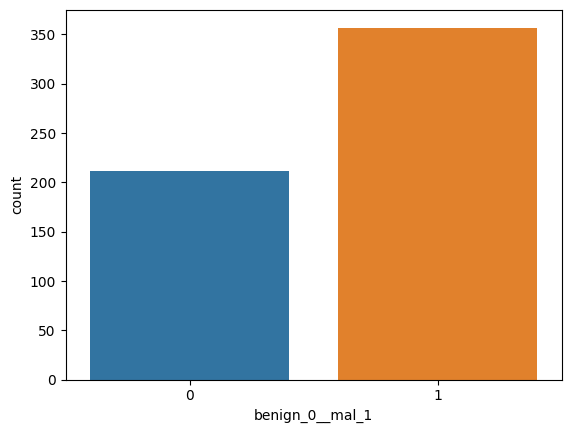

In [5]:
sns.countplot(data = df, x = 'benign_0__mal_1')

<Axes: >

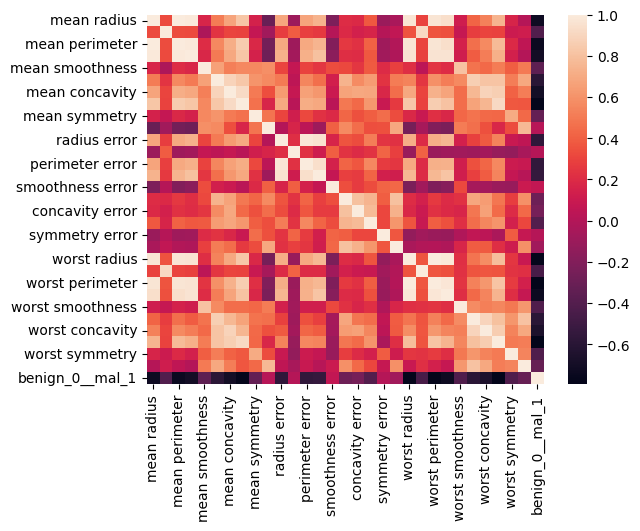

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

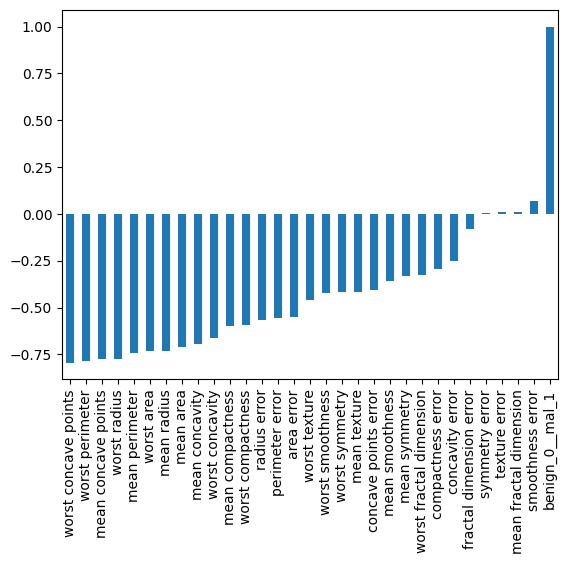

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

#Train Test Split

In [9]:
X = df.drop('benign_0__mal_1', axis = 1).values

In [10]:
y  = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

#Scale the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
print(X_test)

[[0.26317335 0.29861346 0.2461044  ... 0.29010309 0.27951902 0.11025843]
 [0.34536915 0.21203923 0.32136119 ... 0.25611684 0.22866154 0.11347239]
 [0.29008269 0.22387555 0.27070086 ... 0.28298969 0.28760103 0.09477896]
 ...
 [0.51954597 0.46060196 0.52553979 ... 0.68591065 0.14508181 0.44182081]
 [0.22696805 0.28643896 0.22772692 ... 0.48659794 0.21584861 0.24701561]
 [0.41680121 0.38451133 0.41303892 ... 0.73333333 0.28346146 0.32638069]]


#Create a Deep Neural Network

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [20]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))#Input layer
model.add(Dense(units = 15, activation = 'relu'))#Hiden layer

model.add(Dense(units = 1, activation = 'sigmoid'))#output layer

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')



#Train the Model

In [21]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test),
          verbose =1)

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.7016 - val_loss: 0.6826
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6666 - val_loss: 0.6559
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6391 - val_loss: 0.6242
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6085 - val_loss: 0.5914
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5770 - val_loss: 0.5575
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5429 - val_loss: 0.5204
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5069 - val_loss: 0.4825
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4684 - val_loss: 0.4417
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4315 - val_loss: 0.4023
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3934 - val_loss: 0.3654
Epoch 11

In [22]:
model_loss = pd.DataFrame(model.history.history)

In [23]:
model_loss.head()

,loss,val_loss
0,0.701637,0.682558
1,0.666577,0.655870
2,0.639072,0.624240
3,0.608506,0.591428
4,0.577023,0.557461


In [24]:
model_loss.max()

loss        0.701637
val_loss    0.682558
dtype: float64

<Axes: >

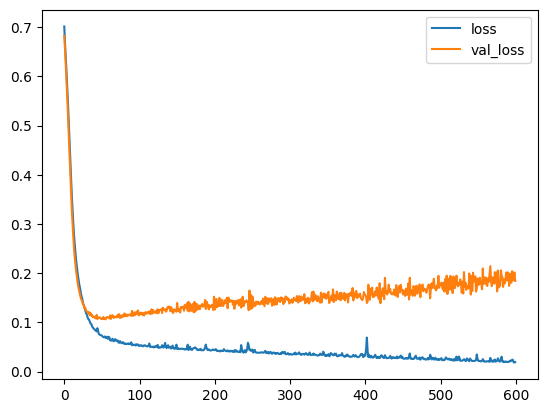

In [25]:
model_loss.plot()

#Early Stopping

In [26]:
model_e = Sequential()

model_e.add(Dense(units = 30, activation = 'relu'))#Input Layer
model_e.add(Dense(units = 15, activation = 'relu'))#Hidden Layer

model_e.add(Dense(units = 1, activation = 'relu'))#Output Layer

model_e.compile(loss  = 'binary_crossentropy', optimizer = 'adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
earl_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [29]:
model_e.fit(x = X_train,
            y = y_train,
            epochs = 600,
            validation_data = (X_test, y_test),
            verbose = 1,
            callbacks = [earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 4.0308 - val_loss: 1.1992
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 1.1948 - val_loss: 1.2968
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 1.0142 - val_loss: 0.9967
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.8982 - val_loss: 0.8459
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.8017 - val_loss: 0.7571
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7254 - val_loss: 0.6846
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6535 - val_loss: 0.6152
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5857 - val_loss: 0.5463
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5198 - val_loss: 0.4793
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4542 - val_loss: 0.4180
Epoch 11

In [30]:
e_model_loss = pd.DataFrame(model.history.history)

<Axes: >

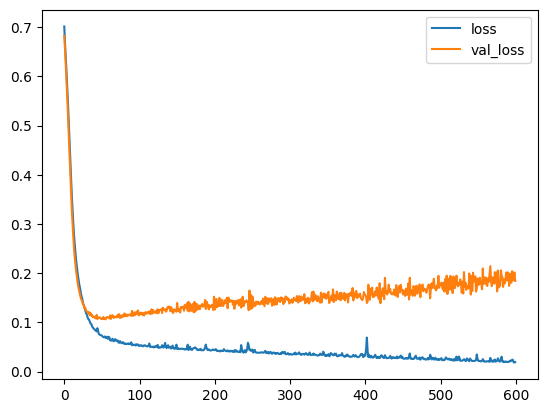

In [31]:
e_model_loss.plot()

#Dropout

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model_d = Sequential()

model_d.add(Dense(units = 30, activation = 'relu'))#Input Layer
model_d.add(Dropout(0.5))

model_d.add(Dense(units = 15, activation = 'relu'))#Hideen Layer
model_d.add(Dropout(0.5))

model_d.add(Dense(units = 1, activation = 'sigmoid'))#Output layer
model_d.compile(loss  = 'binary_crossentropy', optimizer = 'adam')


In [34]:
model_d.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test),
          verbose = 1,
          callbacks = [earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.7051 - val_loss: 0.6794
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6947 - val_loss: 0.6668
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6698 - val_loss: 0.6581
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6610 - val_loss: 0.6449
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6380 - val_loss: 0.6269
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6355 - val_loss: 0.6082
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6209 - val_loss: 0.5898
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5998 - val_loss: 0.5699
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5962 - val_loss: 0.5471
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5722 - val_loss: 0.5180
Epoch 11

In [35]:
d_model_loss = pd.DataFrame(model_d.history.history)

<Axes: >

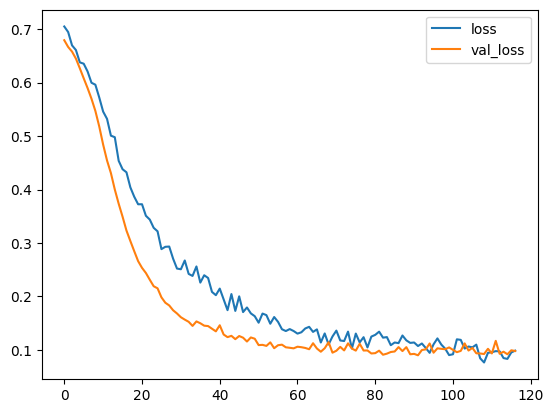

In [36]:
d_model_loss.plot()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 2ms/step


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.99      0.91      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



In [40]:
confusion_matrix(y_test, predictions)

array([[54,  1],
       [ 8, 80]])

In [41]:
predictions_e = (model_e.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 2ms/step


In [42]:
print(classification_report(y_test,predictions_e))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.98      0.99        88

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [43]:
confusion_matrix(y_test, predictions_e)

array([[55,  0],
       [ 2, 86]])

In [44]:
predictions_d = (model_d.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 3ms/step


In [45]:
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [46]:
confusion_matrix(y_test, predictions_d)

array([[54,  1],
       [ 4, 84]])